In [1]:
# IMPORT LIBRARY 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
 
import plotly.express as px

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets Load the DataFile 
data = pd.read_csv(r'C:\Users\patel\OneDrive\Desktop\Unsupervised Learning\USL Case study\USL Case study/Country-data.csv')

In [3]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [4]:
## Lets Explore the DataSet

In [5]:
data.shape

(167, 10)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# Correlation heatmap

<Axes: >

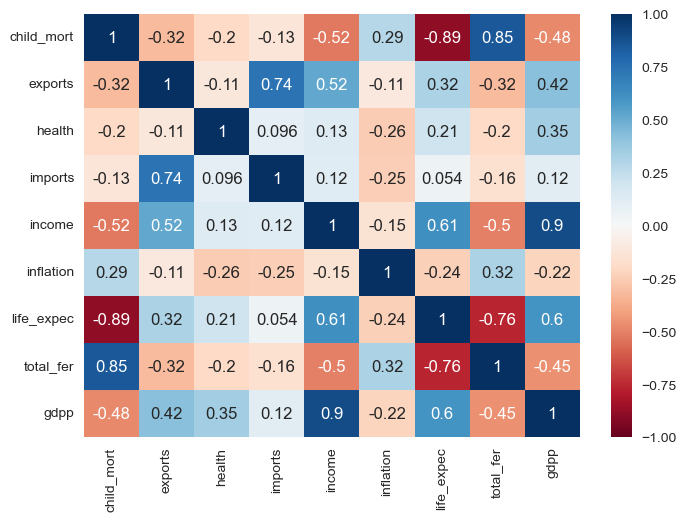

In [9]:
sns.heatmap(data.corr(numeric_only=True), annot=True,vmin=-1, cmap='RdBu')

In [10]:
### Visualize the data 

In [11]:
data.set_index('country', inplace=True) # Before we begin lets convert country column to index(as its redundant for clustering purpose)

In [12]:
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


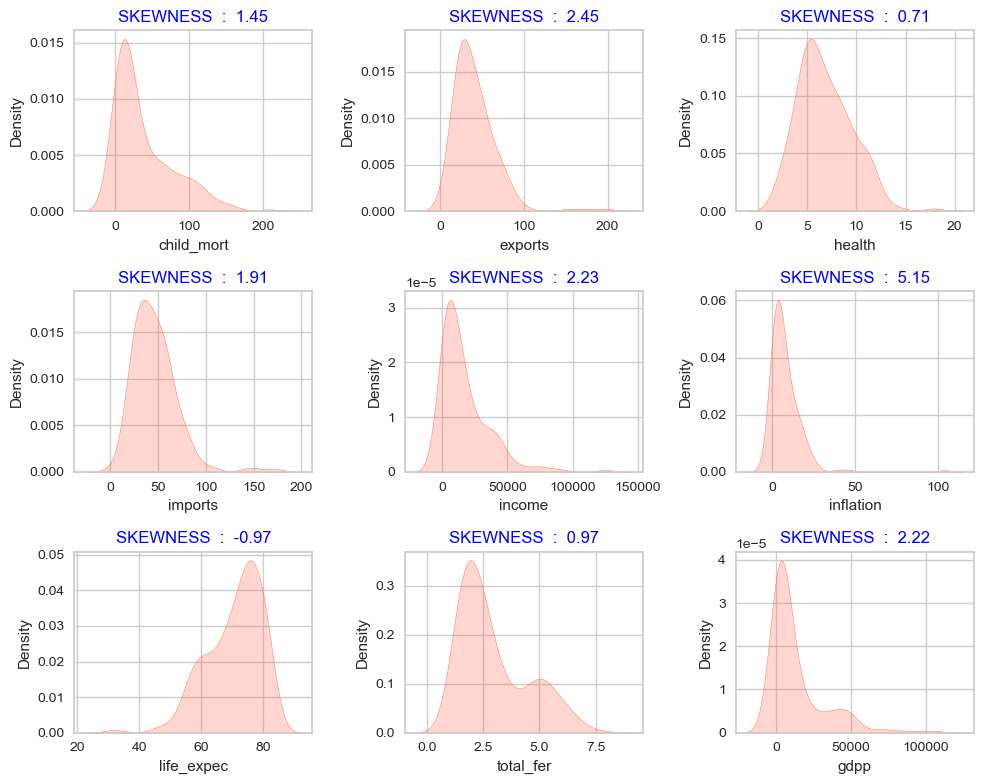

In [13]:
t =1 

plt.figure(figsize=(10,8))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data,x=i,fill=True,color='tomato')
    plt.title(f'SKEWNESS  :  {round(data[i].skew(),2)}',color='blue')
    t+=1
plt.tight_layout()
plt.show()

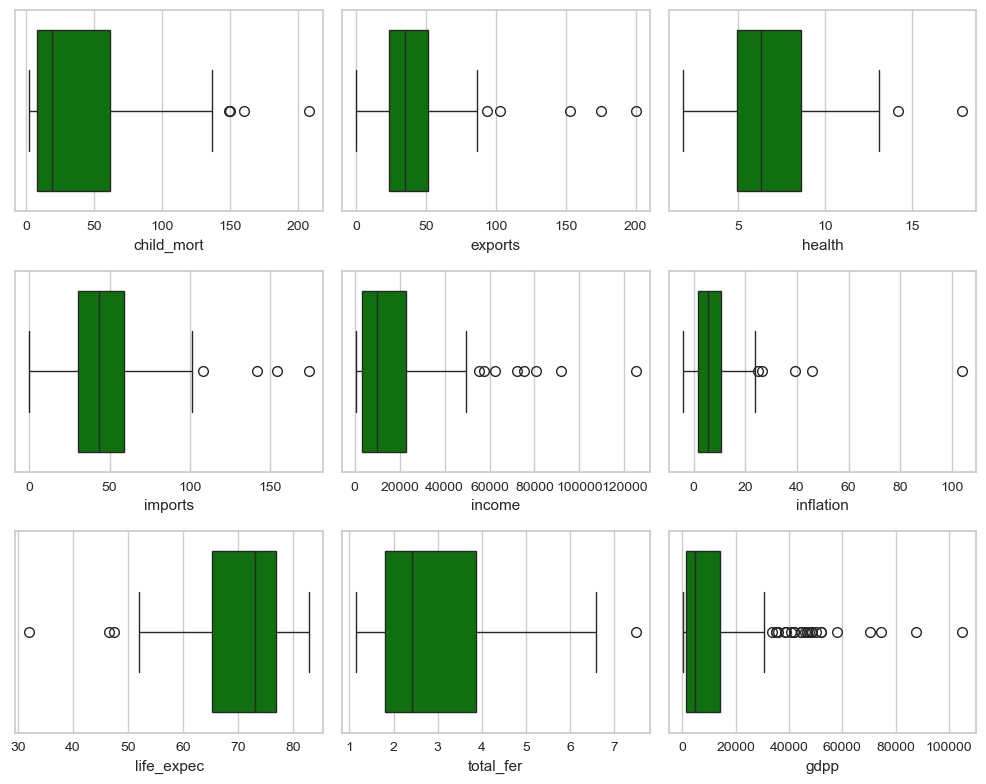

In [14]:
t =1 

plt.figure(figsize=(10,8))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='green')
    t+=1
plt.tight_layout()
plt.show()

In [15]:
# Multivariate Analysis

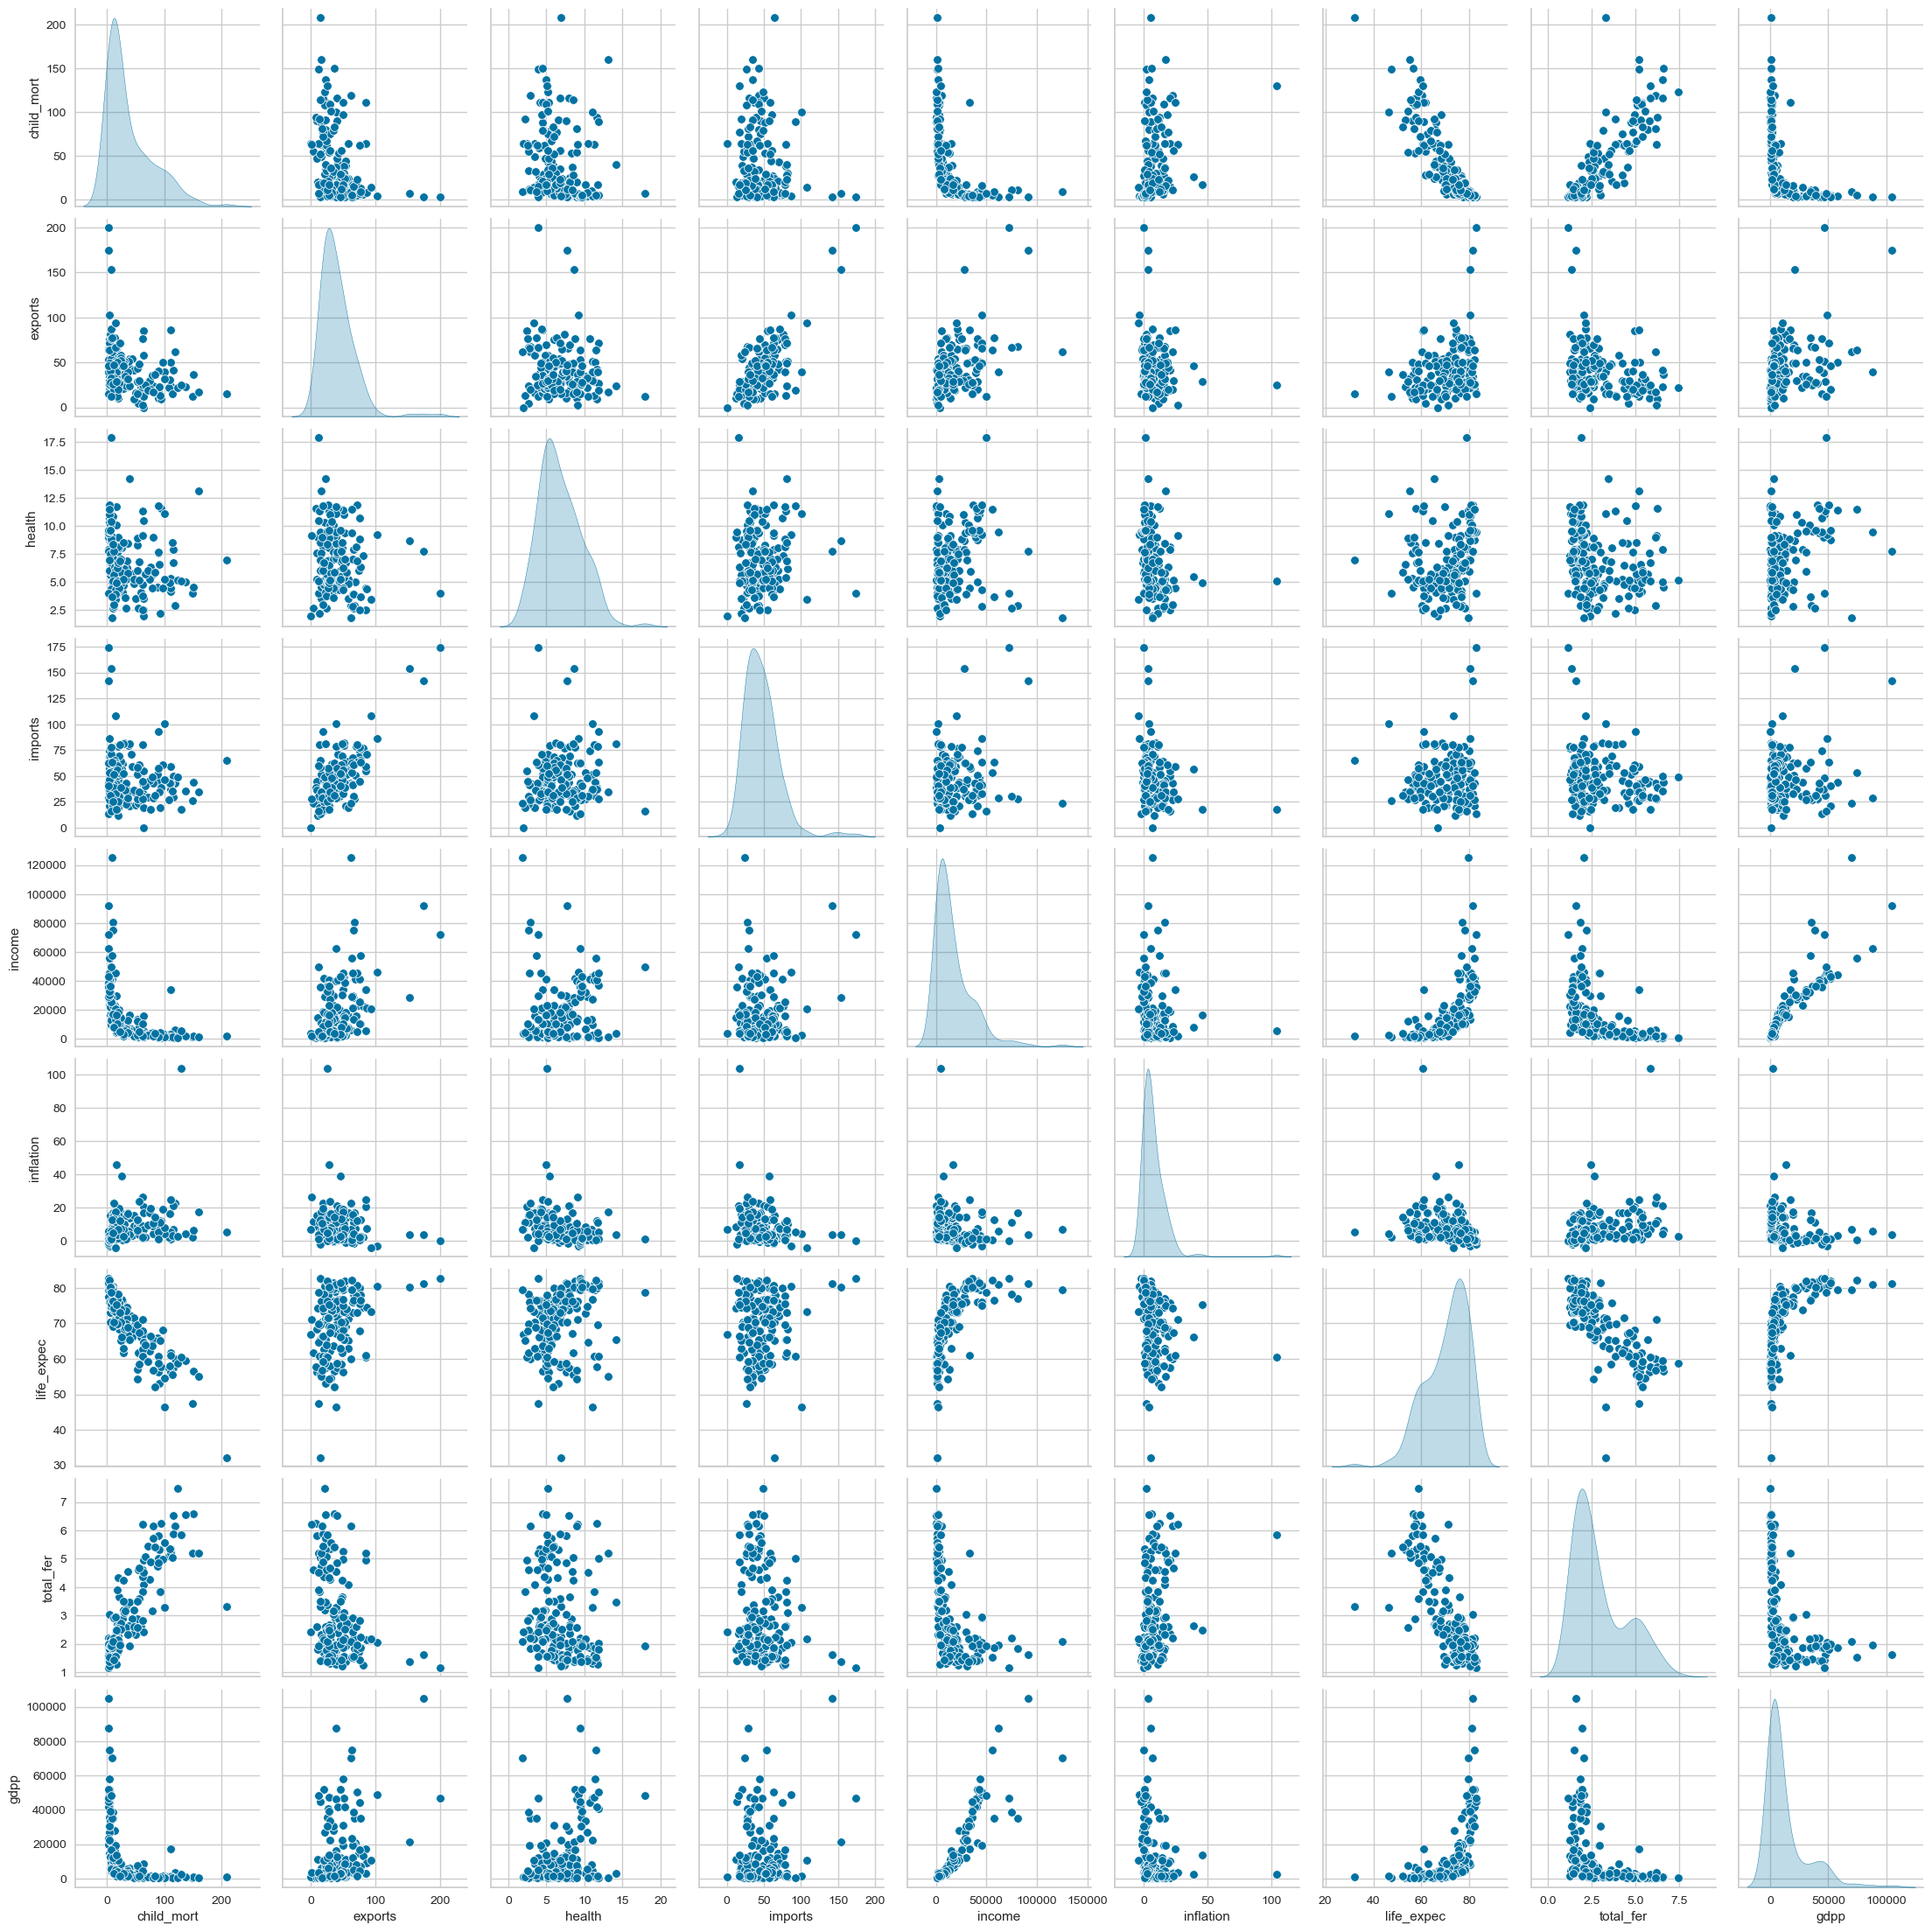

In [16]:
sns.pairplot(data,diag_kind='kde')
plt.show()

In [17]:
# Lets Prerprocessing 

In [18]:
# Checking for missing values
data.isnull().sum().sum()

np.int64(0)

In [19]:
# Lets treat the Extreme Outliers using IQR method we will do capping
# In order to cap extreme outliers lets keep whisker length = 2,5 

In [20]:

for i in data.columns:
    q3,q1 = np.quantile(data[i],[0.75,0.25])
    iqr= q3-q1
    ul = q3 + 2.5*iqr
    ll = q1 - 2.5*iqr
    data[i].apply(lambda x: ul if x>ul else ll if x<ll else x )

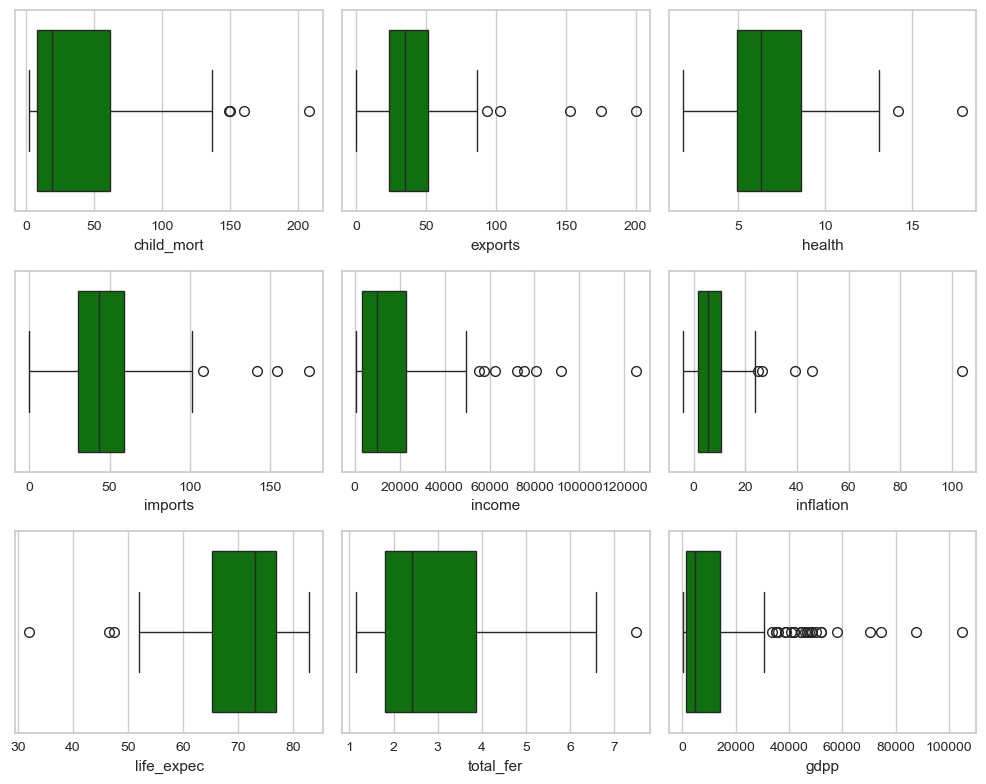

In [21]:
t =1 

plt.figure(figsize=(10,8))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='green')
    t+=1
plt.tight_layout()
plt.show()

In [22]:
# Lets apply PCA on the data Before we proceed with clustering.just to have better visualisation
# and for better clustering 
# In PCA we need to pass Standardized data. 
# Lets import required library 


# Lets Create instance for scaler
scaler = StandardScaler()

# Lets Create instance for PCA
pca = PCA(n_components=5,random_state=2)

# Lets create Pipeline for scaling and PCA(above two steps)
pipeline = Pipeline([('Scale',scaler),('PCA',pca)])

In [23]:
pipeline.fit(data)

Pipeline(steps=[('Scale', StandardScaler()),
                ('PCA', PCA(n_components=5, random_state=2))])

In [24]:
pca.explained_variance_ratio_.cumsum()

# At n_components=5 we are able to explain 95% variance so we will keep n_components=5 for PCA, which is good Enough 
# So 9 dimension data is reduced to 5 dimension data now

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998])

In [25]:
final_data = pipeline.transform(data)

In [26]:
# .transform returns the array lets convert it to DataFrame 
final_data = pd.DataFrame(final_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)

In [27]:
final_data.head(2)

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,-0.158310
Albania,0.429911,-0.588156,-0.333486,-1.161059,0.174677


In [28]:
# k-Means Clustering

In [29]:
# Indetify the value of K 

# KElbow Visualizer
kelbow = KElbowVisualizer(estimator=KMeans(random_state=2),k=10)

  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.

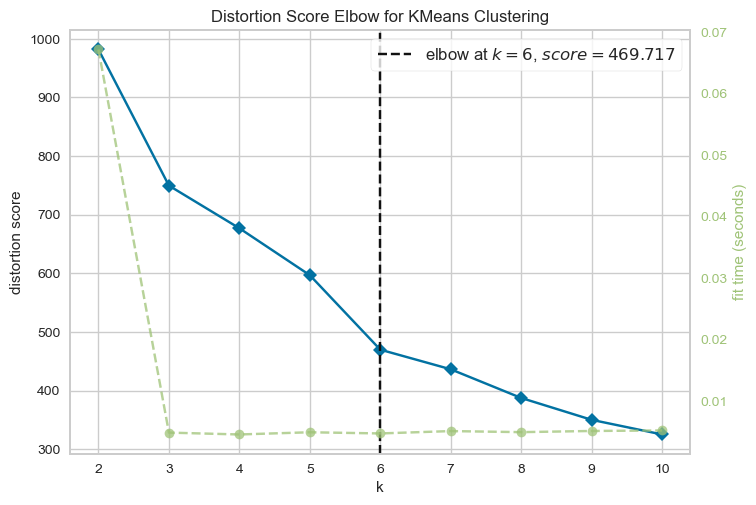

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
kelbow.fit(final_data)
kelbow.show()

In [31]:
# Although the Above plot marks the elbow at k=6 , but we can see the significant drop in distortion score from k= 2 to k =3
# as we increase no. of cluster it might become overfitted , lets explore sillhouette Visualizer to identify more generalized
# Value of K.

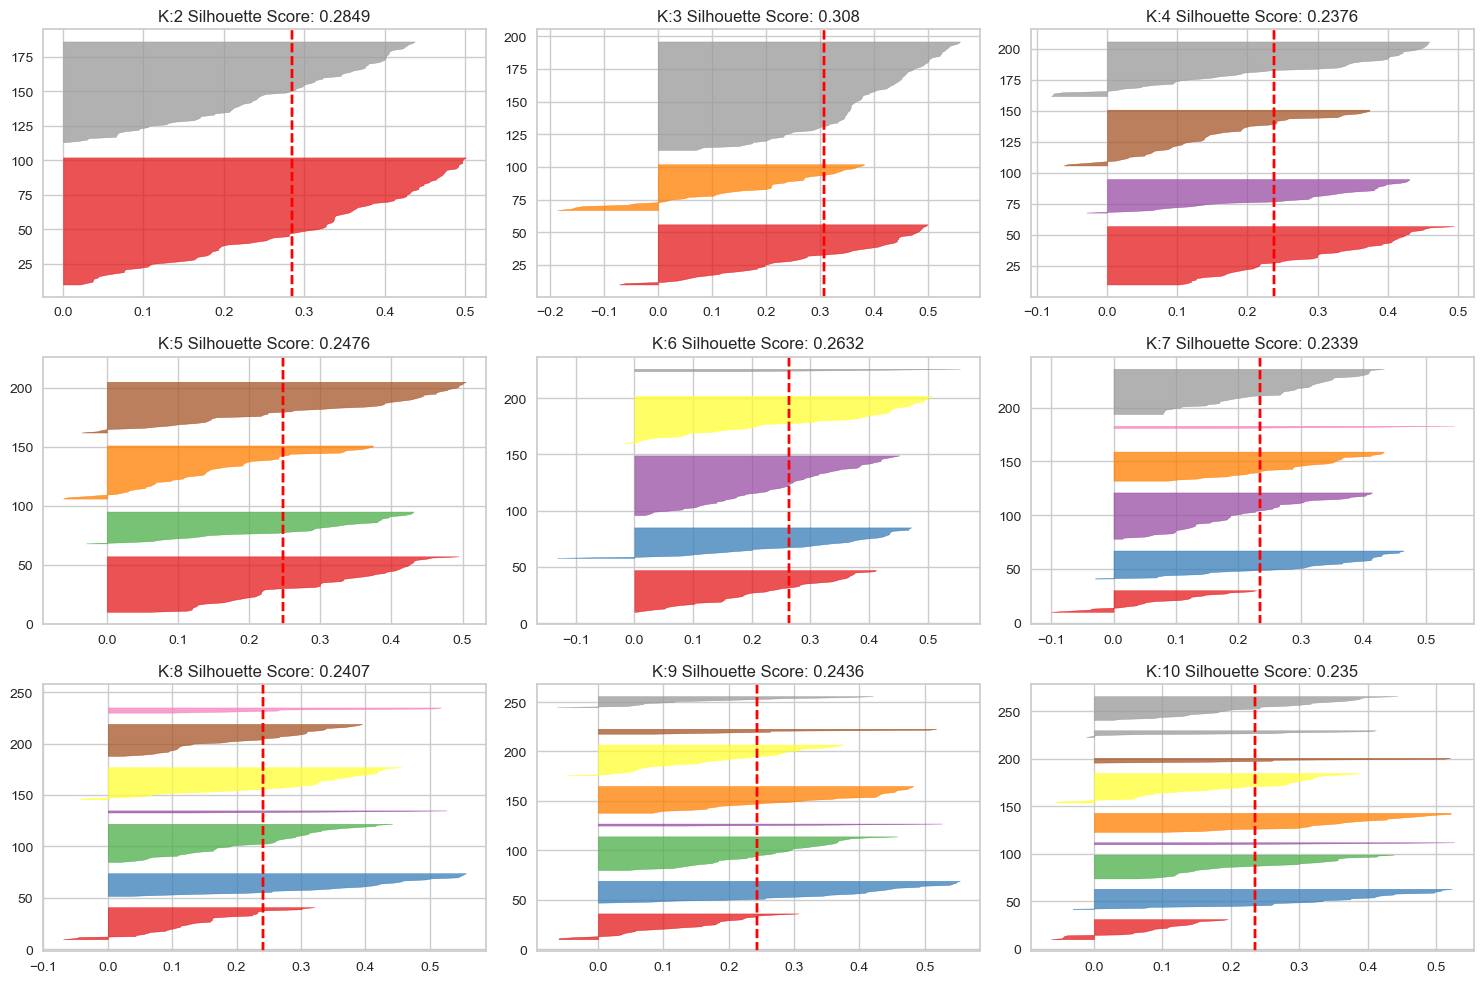

In [32]:
t=1 
plt.figure(figsize=(15,10))
for i in range(2,11):
    plt.subplot(3,3,t)
    model = KMeans(n_clusters=i,random_state=2)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'K:{i} Silhouette Score: {round(sil_viz.silhouette_score_,4)}')
    sil_viz.fit(final_data)

    t+=1

plt.tight_layout()
plt.show()

In [33]:
# so after analyzing both elbow and sillhouette visualizer lets go with k =3 altough there are few data point that have been
# miscalssified but we see no drop in silhouette score and there is good enough data in every cluster 
# Also from kElbow plot it was observed signigicant drop in wcss/distortion/ was observed from k=2 to k=3

In [34]:
final_kmeans = KMeans(n_clusters=3,random_state=2)
labels = final_kmeans.fit_predict(final_data)

In [35]:
# Lets check the silhouette score for k=3
print(silhouette_score(final_data,labels))

0.3079769786519013


In [36]:
# Lets put these label on PCA Data 
final_data['Labels'] = labels
final_data.head(3)

,PC1,PC2,PC3,PC4,PC5,Labels
country,,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
Albania,0.429911,-0.588156,-0.333486,-1.161059,0.174677,2
Algeria,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2


In [37]:
# Lets Visualize the clusters
# in order get the best best visualization we will use pc1 and pc2 as they have maximum variance explained

In [38]:
centroids = final_kmeans.cluster_centers_
centroids



array([[-2.43461995,  0.41127566, -0.09616666,  0.69171004, -0.14145844],
       [ 2.76977273, -0.21301421,  0.06888632,  0.86680107, -0.17822588],
       [ 0.17518237, -0.13882672,  0.02428483, -0.75851441,  0.15553189]])

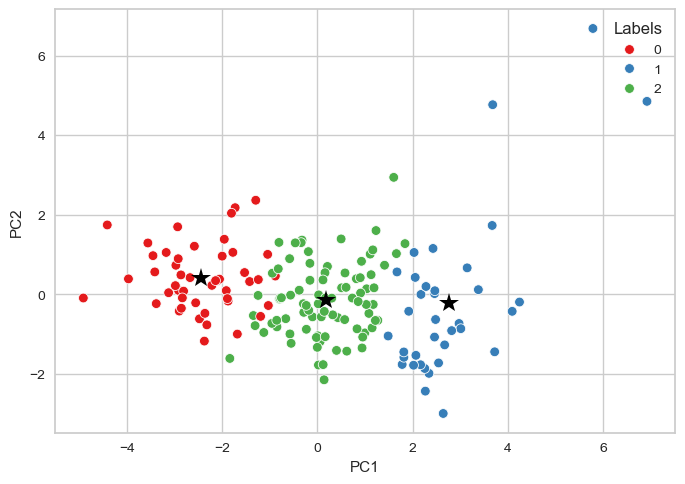

In [39]:
sns.scatterplot(data=final_data,x='PC1',y='PC2',hue='Labels',palette='Set1')
for i in range(3):
    plt.plot(centroids[i,0],centroids[i,1],marker='*',markersize=15,color='black')
    
plt.show()

In [40]:
# to have nusiness undersantding of clusters lets merge these labels with original data
data['label']=labels
data.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2


In [41]:
data.groupby(by='label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


In [42]:
# After Studying the above data we can conclude that have been assigned 0 can be called Underdeveloped countries.
# Countries belonging to Custer 1 are developed countries with high GDP, low martality.
# Countries belonging to cluster 2 are doing average in most factor but struggling in some factors like gdp , health etc 
# Hence they can be called developing countries.

In [43]:
data['label'] = data['label'].map({0:'Underdeveloped',1:'Developed',2:'Developing'})

In [44]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing


In [45]:
# Developed Countries 
data[data['label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [46]:
# Developing Countries 
data[data['label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
       'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines', 'Suri

In [47]:
data[data['label']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda',
       'Yemen', 'Zambia'],
      dtype='object', name='country')

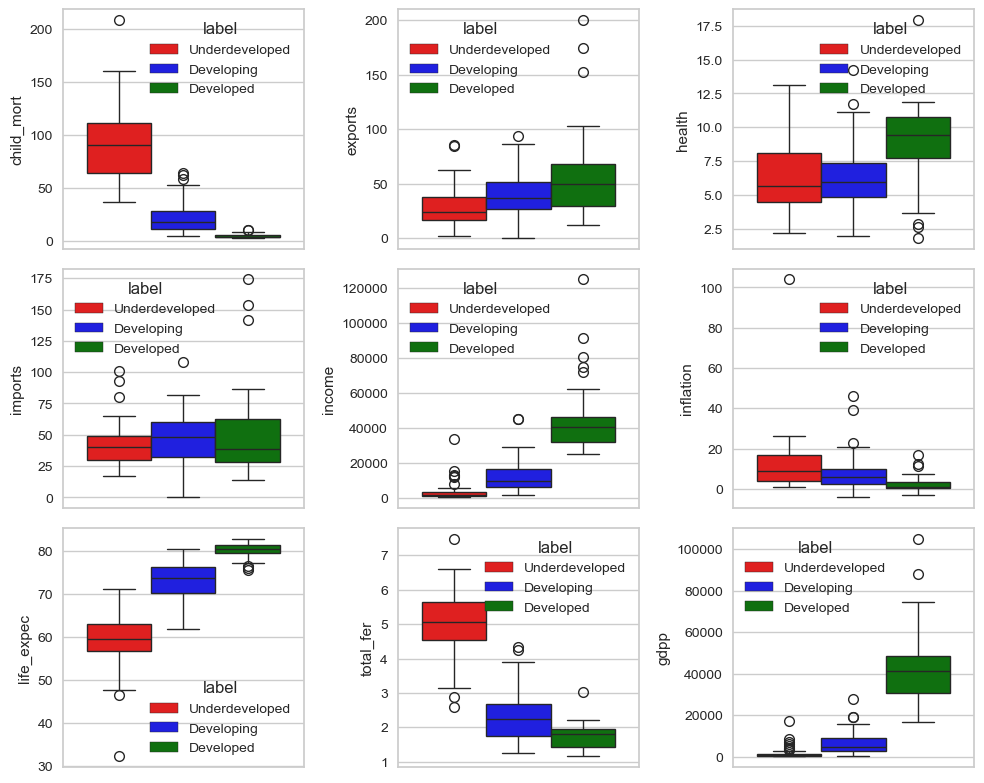

In [48]:
t =1 

plt.figure(figsize=(10,8))
for i in data.columns:
    if i!='label':
        plt.subplot(3,3,t)
        sns.boxplot(data=data,y=i,hue='label',palette=['red','blue','green'])
    t+=1
plt.tight_layout()
plt.show()

In [49]:
# World Map

px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='label',
               color_discrete_map={'Underdeveloped':'red','Developed':'green','Developing':'blue'})

In [50]:
# Deployement 

In [51]:
final_pipeline = Pipeline([('Scale',scaler),('PCA',pca),
                           ('Model',final_kmeans)])

In [52]:
input_data = data.iloc[0,:-1].values
input_data

array([np.float64(90.2), np.float64(10.0), np.float64(7.58),
       np.float64(44.9), np.int64(1610), np.float64(9.44),
       np.float64(56.2), np.float64(5.82), np.int64(553)], dtype=object)

In [53]:
pipeline.transform([input_data])

array([[-2.91302459,  0.09562058, -0.7181185 ,  1.00525464, -0.15831004]])

In [54]:
final_input_data = pipeline.transform([input_data])
final_input_data

array([[-2.91302459,  0.09562058, -0.7181185 ,  1.00525464, -0.15831004]])

In [55]:
final_kmeans.predict(final_input_data)[0]

np.int32(0)

In [56]:
# lets create a joblib file of pipeline

In [57]:
with open('pipeline.joblib','wb') as file:
    joblib.dump(pipeline,file)

In [58]:
# lets create a joblib file od model
with open('model.joblib','wb') as file:
    joblib.dump(final_kmeans,file)